# 1. Setup and Load Data

#### 1.1 Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.3.2
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.

In [115]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [5]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.3.2
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

In [6]:
!pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)


In [7]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.3.2
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

In [9]:
!pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


In [10]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.3.2
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

In [11]:
import tensorflow as tf
import os

In [12]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [13]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [14]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [15]:
gpus

[]

In [16]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 32A6-A674

 Directory of C:\Users\Baburam Chaudhary

02/24/2023  03:44 ???????    <DIR>          .
02/24/2023  03:44 ???????    <DIR>          ..
11/26/2022  09:01 ???????    <DIR>          .anaconda
02/15/2023  03:18 ?????????    <DIR>          .atom
09/23/2021  01:32 ???????    <DIR>          .aws
09/23/2021  01:32 ???????    <DIR>          .azure
12/06/2022  05:04 ???????             5,140 .bash_history
06/07/2022  01:50 ???????    <DIR>          .cache
02/24/2023  03:45 ???????    <DIR>          .conda
11/26/2022  12:05 ?????????                25 .condarc
11/26/2022  12:04 ?????????    <DIR>          .continuum
12/05/2022  11:52 ???????               163 .gitconfig
02/11/2023  06:18 ???????    <DIR>          .idlerc
02/24/2023  03:44 ???????    <DIR>          .ipynb_checkpoints
02/17/2022  10:42 ???????    <DIR>          .ipython
11/25/2022  12:13 ?????????    <DIR>          .jupyter
10/19/2022  09:23 ???????    <DIR>      

#### 1.2 Remove dodgy images

In [22]:
import cv2
import imghdr

In [23]:
data_dir = 'data'

In [32]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [25]:
   os.listdir(data_dir)

['happy', 'happy people.zip', 'sad', 'sad people.zip']

In [26]:
os.listdir(data_dir)

['happy', 'sad']

In [28]:
len(os.listdir(os.path.join(data_dir, 'happy')))

340

In [33]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            

#### 1.3 Load Data

In [35]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, s

In [36]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [63]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 273 files belonging to 2 classes.


In [38]:
data_iterator = data.as_numpy_iterator()

In [47]:
batch = data_iterator.next()

In [48]:
batch[0].shape

(32, 256, 256, 3)

In [101]:
# image data
batch

(array([[[[0.2623468 , 0.33434436, 0.13615195],
          [0.28688726, 0.36531863, 0.15747549],
          [0.32230392, 0.41482842, 0.18936887],
          ...,
          [0.3951593 , 0.4139706 , 0.14963235],
          [0.40621936, 0.41256127, 0.1359375 ],
          [0.47763482, 0.47763482, 0.19669117]],
 
         [[0.2799558 , 0.35195336, 0.15376097],
          [0.28952217, 0.37017074, 0.16011041],
          [0.33599266, 0.4289349 , 0.20305762],
          ...,
          [0.46180362, 0.48061487, 0.21655513],
          [0.4695111 , 0.47648495, 0.2013393 ],
          [0.53061175, 0.5308581 , 0.2499145 ]],
 
         [[0.30848438, 0.38048193, 0.18228951],
          [0.29379106, 0.3780317 , 0.16437928],
          [0.35816997, 0.451789  , 0.22523493],
          ...,
          [0.5697748 , 0.5885861 , 0.3249775 ],
          [0.57205075, 0.58004844, 0.30729753],
          [0.61644036, 0.6170858 , 0.3361422 ]],
 
         ...,
 
         [[0.65982413, 0.43320942, 0.34199673],
          [0.63022

In [51]:
# image label
batch[1] 

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

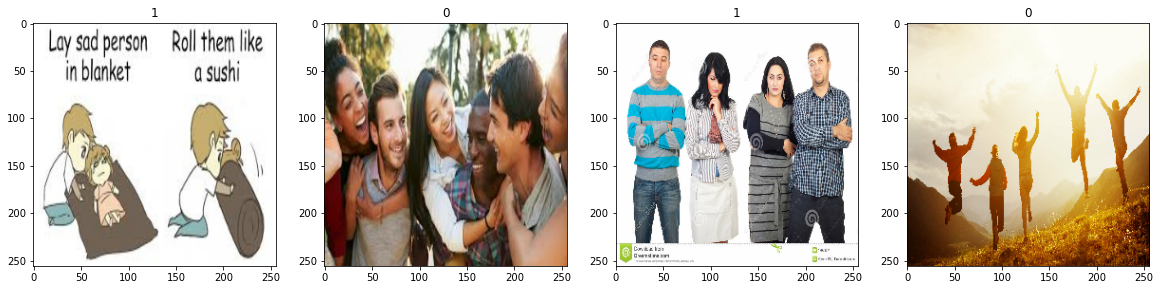

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data

### 2.1 Scale data

In [64]:
data = data.map(lambda x, y : ( x/255, y))

In [71]:
scaled_iterator = data.as_numpy_iterator()

In [72]:
batch = scaled_iterator.next()

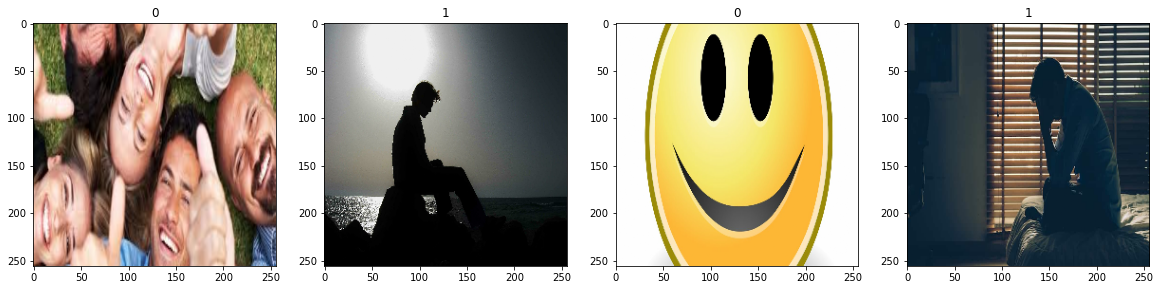

In [73]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split data

In [74]:
len(data)

9

In [77]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [78]:
train_size, val_size, test_size

(6, 2, 1)

In [79]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. Deep Model

#### 3.1 Build Deep Learning Model

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [81]:
model = Sequential()

In [82]:
MaxPooling2D??

Init signature:
MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.MaxPool2D", "keras.layers.MaxPooling2D")
class MaxPooling2D(Pooling2D):
    """Max pooling operation for 2D spatial data.

    Downsamples the input along its spatial dimensions (height and width)
    by taking the maximum value over an input window
    (of size defined by `pool_size`) for each channel of the input.
    The window is shifted by `strides` along each dimension.

    The resulting output,
    when using the `"valid"` padding option, has a spatial shape
    (number of rows or columns) of:
    `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
    (when `input_shape >= pool_size`)

    The resulting output shape when using the `"same"` padding option is:
    `output_shape = math.floor((input_shape - 1) / strides) + 1`

    For example, for `strides=(1, 1)` and `padding="valid"`:

    >>

In [83]:
Dense??

Init signature:
Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.Dense")
class Dense(Layer):
    """Just your regular densely-connected NN layer.

    `Dense` implements the operation:
    `output = activation(dot(input, kernel) + bias)`
    where `activation` is the element-wise activation function
    passed as the `activation` argument, `kernel` is a weights matrix
    created by the layer, and `bias` is a bias vector created by the layer
    (only applicable if `use_bias` is `True`). These are all attributes of
    `Dense`.

    Note: If the input to the layer has a rank greater than 2, then `Dense`
    computes the dot product between the `inputs` and the `kernel` along the
    last axis of the `inputs` a

In [84]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [87]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#### 3.2 Train

In [88]:
logdir = 'logs'

In [89]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [90]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 23s 2s/step - loss: 1.1757 - accuracy: 0.5469 - val_loss: 0.6995 - val_accuracy: 0.5781
Epoch 2/20
6/6 [==============================] - 15s 2s/step - loss: 0.6016 - accuracy: 0.7083 - val_loss: 0.5654 - val_accuracy: 0.7812
Epoch 3/20
6/6 [==============================] - 14s 2s/step - loss: 0.5746 - accuracy: 0.7552 - val_loss: 0.5255 - val_accuracy: 0.7812
Epoch 4/20
6/6 [==============================] - 14s 2s/step - loss: 0.5058 - accuracy: 0.7656 - val_loss: 0.4083 - val_accuracy: 0.8125
Epoch 5/20
6/6 [==============================] - 13s 2s/step - loss: 0.4163 - accuracy: 0.7969 - val_loss: 0.3861 - val_accuracy: 0.7812
Epoch 6/20
6/6 [==============================] - 14s 2s/step - loss: 0.4259 - accuracy: 0.8229 - val_loss: 0.2856 - val_accuracy: 0.8281
Epoch 7/20
6/6 [==============================] - 14s 2s/step - loss: 0.2969 - accuracy: 0.8698 - val_loss: 0.2096 - val_accuracy: 0.9844
Epoch 8/20
6/6 [==================

In [91]:
hist

In [92]:
hist.history

{'loss': [1.17573082447052,
  0.6015646457672119,
  0.5746185183525085,
  0.5057573914527893,
  0.4163320064544678,
  0.42585086822509766,
  0.2969023883342743,
  0.2561589777469635,
  0.2246544361114502,
  0.14644403755664825,
  0.1314527839422226,
  0.0818592831492424,
  0.05864708498120308,
  0.06036361679434776,
  0.055989667773246765,
  0.044202595949172974,
  0.02719520963728428,
  0.020960355177521706,
  0.04286874458193779,
  0.028188705444335938],
 'accuracy': [0.546875,
  0.7083333134651184,
  0.7552083134651184,
  0.765625,
  0.796875,
  0.8229166865348816,
  0.8697916865348816,
  0.9114583134651184,
  0.9322916865348816,
  0.9635416865348816,
  0.953125,
  0.9791666865348816,
  0.9895833134651184,
  0.9895833134651184,
  0.9947916865348816,
  0.9947916865348816,
  0.9947916865348816,
  0.9895833134651184,
  0.984375,
  0.9947916865348816],
 'val_loss': [0.6994885802268982,
  0.5654288530349731,
  0.5254631638526917,
  0.4082634449005127,
  0.3861011266708374,
  0.2855511009

#### 3.3 Plot Performance

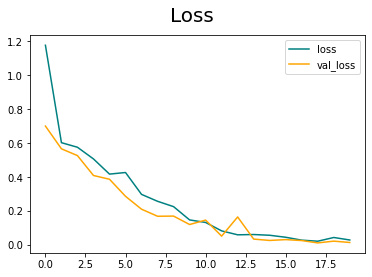

In [94]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

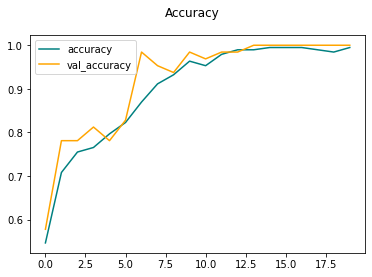

In [98]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy')
plt.legend(loc='upper left')
plt.show()

# 4. Evaluate Performance

#### 4.1 Evaluate

In [99]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [100]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [102]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 425ms/step


In [104]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result()}, Accuracy: {acc.result()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


#### 4.2 Test

In [105]:
import cv2

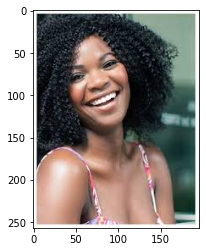

In [185]:
img = cv2.imread('data/happy_5.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

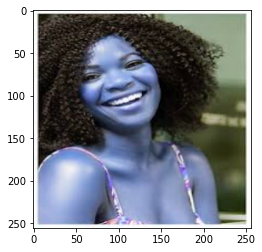

In [186]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [187]:
resize.shape

TensorShape([256, 256, 3])

In [188]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [189]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 42ms/step


In [190]:
if yhat > .5:
    print(f"Predicted class is Sad.")
else:
    print(f"Predicted class is Happy.")

Predicted class is Happy.


# 5. Save the Model

#### 5.1 Save the Model

In [191]:
from tensorflow.keras.models import load_model

In [192]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [193]:
## reloading the model

In [194]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [195]:
new_model

In [196]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 155ms/step


array([[0.18826233]], dtype=float32)